In [1]:
import pandas as pd
import datetime as dt
from game_log import load_current_line
import matplotlib.pyplot as plt

today = dt.datetime.today()
year = today.year
month = today.month
day = today.day
today_str = f'{year}_{month}_{day}'

pp_path = f'Lines/pp/pp_{today_str}.csv'
unabated_path = f'Lines/unabated/unabated_{today_str}.csv'
dog_path = f'Lines/dog/doglines_{today.month}_{today.day}.csv'

pp_lines = load_current_line(pp_path,'prop_id','time')
unabated = load_current_line(unabated_path,'prop_id','time')
#dog_lines = pd.read_csv(dog_path,index_col=0)

In [2]:
#pp_lines['date'] = pp_lines["date"].apply(lambda x: pd.to_datetime(x,utc=True))
#unabated["event_time"].apply(lambda x: pd.to_datetime(x,utc=True))

In [3]:
nba = pp_lines.loc[pp_lines.league_id==7]
combined = unabated.merge(pp_lines[['player','line','stat']],how='inner', on=['player','stat'],suffixes=['_u','_pp'])
combined

,prop_id,player,player_id,line_u,stat,league_id,event_time,opp,Team,count,over_prob,under_prob,pred,time,line_pp
0,00105134-b,D'Onta Foreman,36680,4.5,Receiving Yards,1,2023-11-05 12:00:00-06:00,NO,CHI,8,0.514885,0.485115,5.159517,2023-11-03 11:29:00,5.5
1,00105134-b,D'Onta Foreman,36680,5.5,Receiving Yards,1,2023-11-05 12:00:00-06:00,NO,CHI,7,0.493512,0.506488,5.159517,2023-11-03 11:29:00,5.5
2,ad9b323f-3,Kyren Lacy,173609,31.5,Receiving Yards,2,2023-11-04 18:45:00-05:00,BAMA,LSU,1,0.500000,0.500000,30.801822,2023-11-03 11:29:00,31.5
3,ad9b323f-3,Kyren Lacy,173609,30.5,Receiving Yards,2,2023-11-04 18:45:00-05:00,BAMA,LSU,8,0.500880,0.499120,30.801822,2023-11-03 11:29:00,31.5
4,ae01ee20-b,Bijan Robinson,404689,20.5,Receiving Yards,1,2023-11-05 12:00:00-06:00,ATL,MIN,17,0.499837,0.500163,20.721288,2023-11-03 11:29:00,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,53881a26-b,Audric Estime,159596,71.5,Rush Yards,2,2023-11-04 11:00:00-05:00,CLE,ND,2,0.505230,0.494770,76.721931,2023-11-03 11:29:00,80.5
1468,53881a26-b,Audric Estime,159596,75.5,Rush Yards,2,2023-11-04 11:00:00-05:00,CLE,ND,3,0.500000,0.500000,76.721931,2023-11-03 11:29:00,80.5
1469,53881a26-b,Audric Estime,159596,79.5,Rush Yards,2,2023-11-04 11:00:00-05:00,CLE,ND,3,0.501288,0.498712,76.721931,2023-11-03 11:29:00,80.5
1470,53881a26-b,Audric Estime,159596,80.5,Rush Yards,2,2023-11-04 11:00:00-05:00,CLE,ND,1,0.500000,0.500000,76.721931,2023-11-03 11:29:00,80.5


In [4]:
combined = combined[['prop_id', 'player','line_u','line_pp', 'player_id', 'stat', 
       'event_time', 'opp', 'Team', 'count', 'over_prob', 'under_prob', 'pred',]]

In [5]:
combined.loc[combined.player=='Scottie Barnes']

,prop_id,player,line_u,line_pp,player_id,stat,event_time,opp,Team,count,over_prob,under_prob,pred


In [6]:
combined.loc[combined.line_u == combined.line_pp].sort_values(by='over_prob').head(15)

,prop_id,player,line_u,line_pp,player_id,stat,event_time,opp,Team,count,over_prob,under_prob,pred
1423,5c5bbcc2-b,Desmond Bane,4.5,4.5,235715,AST,2023-11-03 21:00:00-05:00,POR,MEM,12,0.462258,0.537742,4.423479
278,9e353f33-e,Dorian Finney-Smith,0.5,0.5,43020,BLK,2023-11-03 19:00:00-05:00,CHI,BKN,4,0.466967,0.533033,0.627851
1011,0209fcd3-c,Marquez Valdes-Scantling,1.5,1.5,36287,Receptions,2023-11-05 08:30:00-06:00,KC,MIA,15,0.469227,0.530773,1.580169
1471,53d2bd62-d,Cade Otton,3.5,3.5,38910,Receptions,2023-11-05 12:00:00-06:00,HOU,TB,14,0.472340,0.527660,3.539305
1123,6f15549d-3,Tyler Lockett,4.5,4.5,36004,Receptions,2023-11-05 12:00:00-06:00,BAL,SEA,16,0.472416,0.527584,4.521281
144,b43f1ea6-d,Travis Kelce,7.5,7.5,36266,Receptions,2023-11-05 08:30:00-06:00,KC,MIA,17,0.474499,0.525501,7.500000
1442,4e3d10ea-1,Tyler Herro,3.5,3.5,43243,3P,2023-11-03 19:00:00-05:00,MIA,WAS,13,0.474863,0.525137,3.551574
346,9b9cfb9e-8,Tyus Jones,16.5,16.5,109,PTS+AST,2023-11-03 19:00:00-05:00,MIA,WAS,3,0.476088,0.523912,15.979604
265,9e98163e-3,Dalton Schultz,38.5,38.5,35722,Receiving Yards,2023-11-05 12:00:00-06:00,HOU,TB,5,0.476290,0.523710,36.926116
1300,7989bedb-0,Julius Randle,8.5,8.5,43282,TRB,2023-11-03 18:30:00-05:00,MIL,NYK,9,0.478020,0.521980,8.506770


In [7]:
combined.loc[combined.line_u == combined.line_pp].sort_values(by='over_prob').tail(15)

,prop_id,player,line_u,line_pp,player_id,stat,event_time,opp,Team,count,over_prob,under_prob,pred
628,c7ab6f6c-1,Aaron Gordon,0.5,0.5,42722,STL,2023-11-03 21:00:00-05:00,DEN,DAL,6,0.518719,0.481281,0.729633
1268,783d5fe0-d,Ben Simmons,7.5,7.5,43313,PTS,2023-11-03 19:00:00-05:00,CHI,BKN,12,0.519087,0.480913,7.799660
439,e41619bd-7,Kevon Looney,2.5,2.5,238647,AST,2023-11-03 19:00:00-05:00,OKC,GSW,8,0.519178,0.480822,2.750458
130,bfbb8be2-7,Khalil Shakir,2.5,2.5,34263,Receptions,2023-11-05 19:20:00-06:00,CIN,BUF,14,0.519252,0.480748,2.750761
1303,7a7bbae1-f,Jalen Williams,4.5,4.5,241037,AST,2023-11-03 19:00:00-05:00,OKC,GSW,14,0.522495,0.477505,4.791361
929,31909985-2,Kevon Looney,0.5,0.5,238647,STL,2023-11-03 19:00:00-05:00,OKC,GSW,7,0.522559,0.477441,0.737603
757,2bb3e38f-7,Ziaire Williams,9.5,9.5,242428,PTS,2023-11-03 21:00:00-05:00,POR,MEM,9,0.522942,0.477058,9.845471
246,88883337-e,Ben Simmons,6.5,6.5,43313,AST,2023-11-03 19:00:00-05:00,CHI,BKN,13,0.523324,0.476676,6.819217
547,f53774f0-0,Michael Gallup,2.5,2.5,36734,Receptions,2023-11-05 15:25:00-06:00,PHI,DAL,14,0.524257,0.475743,2.771374
706,cf767048-e,Shaedon Sharpe,2.5,2.5,43160,3P,2023-11-03 21:00:00-05:00,POR,MEM,11,0.524960,0.475040,2.774279


In [8]:
combined.loc[combined.player=='Tyreek Hill']

,prop_id,player,line_u,line_pp,player_id,stat,event_time,opp,Team,count,over_prob,under_prob,pred
293,a25a6295-5,Tyreek Hill,90.5,93.5,38949,Receiving Yards,2023-11-05 08:30:00-06:00,KC,MIA,10,0.504374,0.495626,91.469388
294,a25a6295-5,Tyreek Hill,91.5,93.5,38949,Receiving Yards,2023-11-05 08:30:00-06:00,KC,MIA,5,0.500000,0.500000,91.469388
295,a25a6295-5,Tyreek Hill,92.5,93.5,38949,Receiving Yards,2023-11-05 08:30:00-06:00,KC,MIA,1,0.500000,0.500000,91.469388
296,a25a6295-5,Tyreek Hill,93.5,93.5,38949,Receiving Yards,2023-11-05 08:30:00-06:00,KC,MIA,2,0.500000,0.500000,91.469388
364,eb774726-1,Tyreek Hill,6.5,7.0,38949,Receptions,2023-11-05 08:30:00-06:00,KC,MIA,15,0.553924,0.446076,7.039256
365,eb774726-1,Tyreek Hill,7.0,7.0,38949,Receptions,2023-11-05 08:30:00-06:00,KC,MIA,2,0.500000,0.500000,7.039256


In [9]:
test = pd.read_csv('Lines/unabated/unabated_2023_11_1.csv',index_col=0)
test = test.sort_values(by='time')
test

,prop_id,player,player_id,line,stat,league_id,event_time,opp,Team,count,over_prob,under_prob,pred,time
2387,ffd11c66-b,Luka Doncic,93,10.5,TRB,3,2023-11-01 19:30:00-05:00,DAL,CHI,7,0.458455,0.541545,10.300135,2023-11-01 11:31:00
797,54b2c193-8,Jordan Clarkson,43106,5.0,AST,3,2023-11-01 20:00:00-05:00,UTA,MEM,2,0.500000,0.500000,5.363394,2023-11-01 11:31:00
796,548a88d7-e,Brandon Ingram,42496,5.5,TRB,3,2023-11-01 18:30:00-05:00,OKC,NOP,6,0.465273,0.534727,5.426168,2023-11-01 11:31:00
795,548a88d7-e,Brandon Ingram,42496,5.0,TRB,3,2023-11-01 18:30:00-05:00,OKC,NOP,1,0.500000,0.500000,5.426168,2023-11-01 11:31:00
794,546a16da-d,Jaden McDaniels,42701,4.5,TRB+AST,3,2023-11-01 19:00:00-05:00,MIN,DEN,3,0.417160,0.582840,4.219594,2023-11-01 11:31:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,ac0046b5-6,Kyle Anderson,43364,1.5,STL,3,2023-11-01 19:00:00-05:00,MIN,DEN,1,0.324427,0.675573,1.165846,2023-11-01 17:02:00
2440,abfa2182-d,Davion Mitchell,42565,0.5,BLK,3,2023-11-01 21:00:00-05:00,GSW,SAC,3,0.278975,0.721025,0.327190,2023-11-01 17:02:00
2439,abf8adaf-3,Bennedict Mathurin,43529,1.5,3P,3,2023-11-01 18:30:00-05:00,BOS,IND,7,0.329710,0.670290,1.173708,2023-11-01 17:02:00
2437,abe18158-7,Kristaps Porzingis,43441,27.5,PTS+TRB,3,2023-11-01 18:30:00-05:00,BOS,IND,9,0.501814,0.498186,27.699333,2023-11-01 17:02:00


In [10]:
result = test.groupby(['player', 'stat','line']).apply(lambda x: pd.Series({
    'pred': x.sort_values(by='time')['pred'].tolist(),
    'time': x.sort_values(by='time')['time'].tolist()
}))

# Reset the index of the resulting DataFrame
result = result.reset_index()
result

,player,stat,line,pred,time
0,A.J. Brown,Receiving Yards,80.5,"[87.24605182718963, 87.24605182718963]","[2023-11-01 16:37:00, 2023-11-01 17:02:00]"
1,A.J. Brown,Receiving Yards,82.5,"[87.24605182718963, 87.24605182718963]","[2023-11-01 16:37:00, 2023-11-01 17:02:00]"
2,A.J. Brown,Receiving Yards,90.5,"[87.24605182718963, 87.24605182718963]","[2023-11-01 16:37:00, 2023-11-01 17:02:00]"
3,A.J. Brown,Receiving Yards,94.5,"[94.68971170407268, 94.68971170407268, 94.6897...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
4,A.J. Brown,Receptions,5.5,"[6.227329792896925, 6.227329792896925]","[2023-11-01 16:37:00, 2023-11-01 17:02:00]"
...,...,...,...,...,...
3971,Zion Williamson,STL,0.5,"[0.866334902890991, 0.866334902890991, 0.87479...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3972,Zion Williamson,TO,3.5,"[3.347300978882844, 3.360734771263139, 3.34049...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3973,Zion Williamson,TRB,6.5,"[6.625684601112955, 6.631454945107124, 6.59143...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3974,Zion Williamson,TRB+AST,10.5,"[10.719682067806316, 10.723411801908968, 10.67...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."


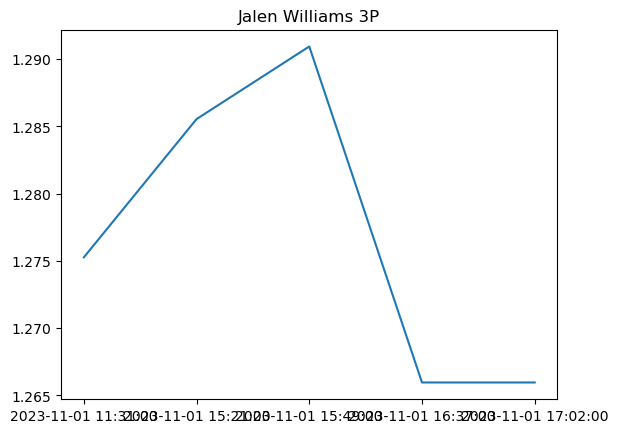

In [11]:

def plot_line_movement(df,idx):
    lines = df.pred.iloc[idx]
    times = df.time.iloc[idx]
    plt.plot(times,lines)
    plt.title(label=(df.loc[idx,'player'] + ' ' + df.loc[idx,'stat']))
    plt.show()
plot_line_movement(result,1766)

In [12]:
result.loc[result.player=='Stephen Curry']

,player,stat,line,pred,time
3546,Stephen Curry,3P,4.5,"[4.868424218682175, 4.859436274380248, 4.86346...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3547,Stephen Curry,AST,5.5,"[5.556613468809646, 5.522609420059362, 5.52472...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3548,Stephen Curry,BLK,0.5,"[0.38585499351359, 0.3854642668765622, 0.38546...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3549,Stephen Curry,BLK+STL,1.5,"[1.4685250982177207, 1.4201760711764395, 1.420...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3550,Stephen Curry,PTS,30.5,"[30.58799484201219, 30.64854902354673, 30.6443...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3551,Stephen Curry,PTS+AST,35.5,"[36.011318234101466, 36.45534303086265, 36.467...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3552,Stephen Curry,PTS+AST,36.5,"[36.011318234101466, 36.45534303086265, 36.467...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3553,Stephen Curry,PTS+TRB,35.5,"[35.6182660851072, 35.695731084311305, 35.6721...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3554,Stephen Curry,PTS+TRB+AST,40.5,"[41.10409771624349, 41.09850933428472, 41.0938...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3555,Stephen Curry,PTS+TRB+AST,41.5,"[41.10409771624349, 41.09850933428472, 41.0938...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."


In [13]:
result.iloc[1760:1770]

,player,stat,line,pred,time
1760,Jalen Johnson,Techs,0.5,"[0.2306509712547582, 0.2295639963631125, 0.229...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1761,Jalen McMillan,Receiving Yards,84.5,"[84.68851847924107, 84.68851847924107, 84.6885...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1762,Jalen Milroe,Passing Yards,238.5,"[241.7044317065812, 241.7044317065812, 241.704...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1763,Jalen Milroe,Passing Yards,242.5,"[241.7044317065812, 241.7044317065812, 241.704...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1764,Jalen Milroe,Rush Yards,34.5,"[35.4305351962387, 35.4305351962387, 35.430535...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1765,Jalen Milroe,Rush Yards,37.5,"[35.4305351962387, 35.4305351962387, 35.430535...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1766,Jalen Williams,3P,1.5,"[1.275265742917396, 1.285550222522425, 1.29095...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1767,Jalen Williams,AST,3.5,"[3.6926927899738726, 3.692403552640074, 3.6748...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1768,Jalen Williams,BLK,0.5,"[0.4230058652983302, 0.4203312687692887, 0.420...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1769,Jalen Williams,BLK+STL,1.5,"[1.6891882198179615, 1.6935793656902267, 1.693...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."


In [14]:
x.columns

NameError: name 'x' is not defined